### Student Information
Name: 劉宗翰

Student ID: 111065532

GitHub ID: #34299101 (HankLiuCode)

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First

In [3]:
import pandas as pd
import numpy as np

In [4]:
### Begin Assignment Here
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X_copy = X.copy()

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_copy

text
0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
...                                                 ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...

[2257 rows x 1 columns]

### Exercise 2
Experiment with other querying techniques using pandas dataframes.
Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more information.

In [5]:
# loc
# loc is primarily label based
X.loc[0]
X.loc[0:5]
X.loc[0:10:2]
X.loc[[0, 2, 4, 6, 8]]
X.loc[0:5, "text":"category"]
X.loc[0:5, ["text", "category_name"]]

## can also be used with boolean arrays
X.loc[:, [True, False, True]]
X.loc[X.loc[:, "category"] == 1]

# setting values
# X.loc[:, "category"] = 10   # sets the column category all to 10
# X.loc[0] = 10               # sets row 0 values all to 10
# X.loc[[0, 4, 8]] = 10       # sets row 0,2,4,6 all to 10

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

In [6]:
# iloc
# iloc is primarily integer based
X.iloc[0]
X.iloc[0:5]
X.iloc[0:10:2]
X.iloc[[0, 2, 4, 6, 8]]
X.iloc[:, [0, 2]]
X.iloc[lambda x: x.index % 2 == 0]

# setting values
# X.iloc[0] = {'text': "Test Text", 'category_name': "Test Categ", "category":1}

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
...                                                 ...       ...   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
2     soc.religion.christian  
4     soc.religion.christian  
6     soc.religion.christian  
8                    sci.med  
...                      ...  
2248           comp.graphics  
2250             alt.atheism  
2252                 sci.med  
2254                 sci.med  
2256                 sci.med  

[1129 rows x 3 columns]

In [7]:
# at & iat
X.at[0, "category"]
X.iat[0, 1]

1

In [8]:
# miscellaneous

# sample
X.sample(n=20)
X.sample(frac=0.1)

# where
# replaces value where condition is true
# X.where(X.loc[:,"category"] == 1, "replaced value")

text  category  \
1701  From: u0mrm@csc.liv.ac.uk (M.R. Mellodew) Subj...         3   
2056  From: eng10205@nusunix1.nus.sg (LING SIEW WEE)...         3   
404   From: sdittman@liberty.uc.wlu.edu (Scott Dittm...         3   
1896  From: fischer@iesd.auc.dk (Lars Peter Fischer)...         1   
37    From: bcash@crchh410.NoSubdomain.NoDomain (Bri...         0   
...                                                 ...       ...   
1419  From: MCAVALCANTI%VORTEX.UFRGS.BR@UICVM.UIC.ED...         1   
280   From: bhjelle@carina.unm.edu () Subject: Re: F...         2   
1793  From: rbutera@owlnet.rice.edu (Robert John But...         3   
937   From: whitsebd@nextwork.rose-hulman.edu (Bryan...         3   
1420  From: ib@ivan.asd.sgi.com (Ivan Bach) Subject:...         1   

               category_name  
1701  soc.religion.christian  
2056  soc.religion.christian  
404   soc.religion.christian  
1896           comp.graphics  
37               alt.atheism  
...                      ...  
1419           comp.graphics  
280                  sci.med  
1793  soc.religion.christian  
937   soc.religion.christian  
1420           comp.graphics  

[226 rows x 3 columns]

### Exercise 5
Checking for missing values

In [9]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# isnull() doesn't work because the values are not actually NaN or None
# they are strings and are not considered null values
# to fix this replace them with real null values
NA_df.loc[NA_df.loc[:, "missing_example"] == "NaN"] = np.nan
NA_df.loc[NA_df.loc[:, "missing_example"] == ""] = np.nan
NA_df.loc[NA_df.loc[:, "missing_example"] == "None"] = None
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### Exercise 6
State the changes that happened to dataframe X

1. First X is loaded only with column text
2. Added category and category_name columns
3. Experiment with missing data, added dummy null value then removed
4. Experiment with duplicate data, added dummy duplicate then removed

### Exercise 8
Do a side by side comparison between two datasets

<AxesSubplot: >

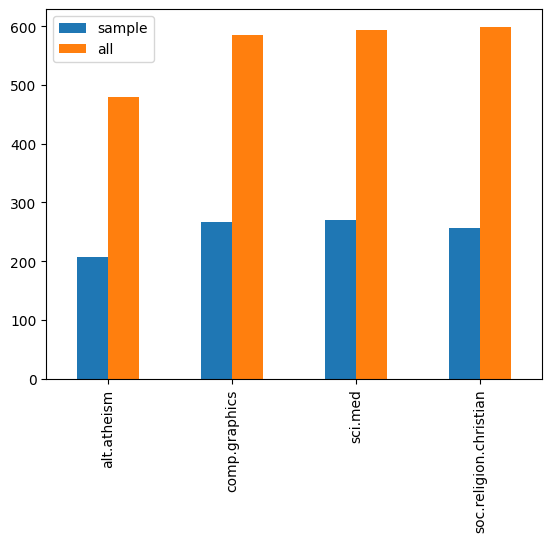

In [11]:
X_sample = X.sample(n=1000) #random state

df = pd.DataFrame({"sample": X_sample.category_name.value_counts(), "all": X.category_name.value_counts()})
df.plot.bar()

### Exercise 10
Verify what the "another 1" represents from the vocabulary

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# Answer here
X_counts[0:5, 0:100].toarray()
word_in_docs = []
for x_count in X_counts[0:5, 0:100].toarray():
    words = [count_vect.get_feature_names_out()[i] for i, c in enumerate(x_count) if c == 1]
    word_in_docs.append(words)

word_in_docs[4]
# the word is 01

['00', '01']

### Exercise 11
Get a nice and useful visualization of the term-document matrix

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

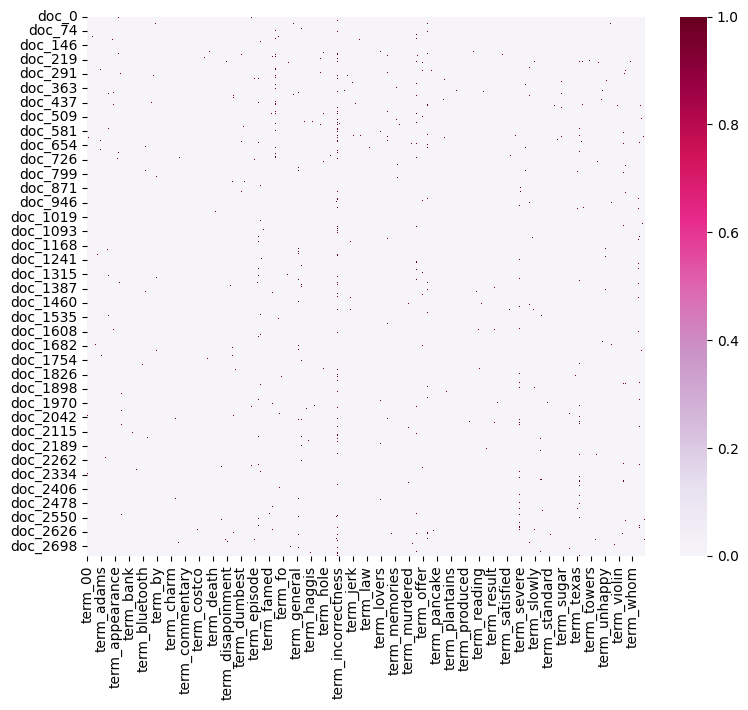

In [62]:
%matplotlib inline


plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))

ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1)

### Exercise 12
reduce the dimension to 3

In [17]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

In [18]:
def show_plot(col, categories, category_points, elev=None, azim=None, roll=None, vertical_axis='z'):
    ax = plt.figure().add_subplot(projection='3d')
    for color, category in zip(col, categories):
        x = category_points[category].T[0]
        y = category_points[category].T[1]
        z = category_points[category].T[2]
        ax.scatter(x, y, z, c = color)
    ax.view_init(elev, azim, roll, vertical_axis)

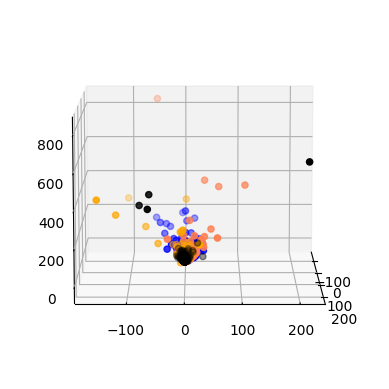

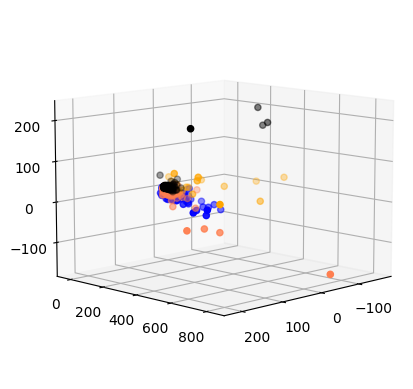

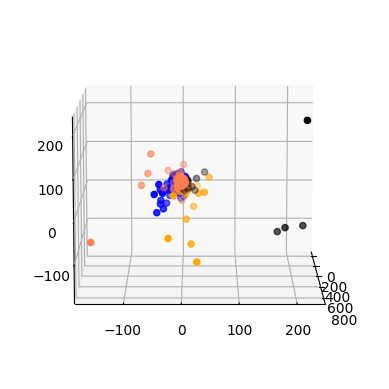

In [19]:
# the points are still tangled together

col = ['coral', 'blue', 'black', 'orange']
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
category_points = {}

for c in categories:
    category_points[c] = X_reduced[X['category_name'] == c]

show_plot(col, categories, category_points, 10, 0, 0, 'x')
show_plot(col, categories, category_points, 10, 45, 0, 'y')
show_plot(col, categories, category_points, 10, 0, 0, 'z')

### Exercise 13
nicer interactive visualization

In [20]:
import plotly.express as px

In [21]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [22]:
data_term = pd.DataFrame({"term": count_vect.get_feature_names_out(), "count": term_frequencies})
fig = px.bar(data_term, x='term', y='count', range_x = [0, 500], range_y=[0, 1000])
fig.show()

### Exercise 14

In [23]:
# Answer here
sieved_terms = data_term.loc[data_term.loc[:, "count"] > 10]
sieved_fig = px.bar(sieved_terms, x='term', y='count', range_x = [0, 500], range_y=[0, 10000])
sieved_fig.show()

### Exercise 15

In [24]:
sorted_terms = data_term.sort_values(by="count", ascending=False)
sorted_fig = px.bar(sorted_terms, x='term', y='count', range_x = [0, 500], range_y=[0, 30000])
sorted_fig.show()

### Exercise 16

In [25]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [26]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_2'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_2  
0           comp.graphics   [0, 1, 0, 0]  
1           comp.graphics   [0, 1, 0, 0]  
2  soc.religion.christian   [0, 0, 0, 1]  
3  soc.religion.christian   [0, 0, 0, 1]  
4  soc.religion.christian   [0, 0, 0, 1]  
5  soc.religion.christian   [0, 0, 0, 1]  
6  soc.religion.christian   [0, 0, 0, 1]  
7                 sci.med   [0, 0, 1, 0]  
8                 sci.med   [0, 0, 1, 0]

# Second

# Outline
1. -
2. Data Source and Preparation

3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

# Data Source and Preperation

In [269]:
import pandas as pd
import numpy as np
import os
import helpers.data_mining_helpers as dmh

filenames = ["imdb_labelled.txt", "amazon_cells_labelled.txt", "yelp_labelled.txt"]

X = pd.DataFrame()
for filename in filenames:
    filepath = os.path.join("data", filename)
    df = pd.read_csv(filepath, sep="\t") 
    df.columns = ["sentence", "score"]
    X = pd.concat([X, df], axis=0, ignore_index=True)

# add features based on column
X["sentiment"] = X.score.apply(lambda s: "positive" if s == 1 else "negative")
X

sentence  score sentiment
0     Not sure who was more lost - the flat characte...      0  negative
1     Attempting artiness with black & white and cle...      0  negative
2          Very little music or anything to speak of.        0  negative
3     The best scene in the movie was when Gerardo i...      1  positive
4     The rest of the movie lacks art, charm, meanin...      0  negative
...                                                 ...    ...       ...
2740  I think food should have flavor and texture an...      0  negative
2741                           Appetite instantly gone.      0  negative
2742  Overall I was not impressed and would not go b...      0  negative
2743  The whole experience was underwhelming, and I ...      0  negative
2744  Then, as if I hadn't wasted enough of my life ...      0  negative

[2745 rows x 3 columns]

# Data Transformation

In [270]:
# 3.1 Converting Dictionary into Pandas dataframe
# use pd.read_csv
# don't need converting

# 3.2 Familiarizing yourself with the Data
X[:10][["sentence","score"]]
X.loc[5:10, "sentence"]

5                                   Wasted two hours.  
6     Saw the movie today and thought it was a good ...
7                                  A bit predictable.  
8     Loved the casting of Jimmy Buffet as the scien...
9                  And those baby owls were adorable.  
10    The movie showed a lot of Florida at it's best...
Name: sentence, dtype: object

# Data Mining using Pandas

In [271]:
# 4.1 Dealing with Missing Values
X.isnull().apply(lambda x: dmh.check_missing_values(x))
dummy_dict = [{"sentence": "this is a sentence", "score": 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            sentiment  
0  The amoung of missing records is:   
1                                   1

In [272]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X

sentence  score sentiment
0     Not sure who was more lost - the flat characte...      0  negative
1     Attempting artiness with black & white and cle...      0  negative
2          Very little music or anything to speak of.        0  negative
3     The best scene in the movie was when Gerardo i...      1  positive
4     The rest of the movie lacks art, charm, meanin...      0  negative
...                                                 ...    ...       ...
2740  I think food should have flavor and texture an...      0  negative
2741                           Appetite instantly gone.      0  negative
2742  Overall I was not impressed and would not go b...      0  negative
2743  The whole experience was underwhelming, and I ...      0  negative
2744  Then, as if I hadn't wasted enough of my life ...      0  negative

[2745 rows x 3 columns]

In [273]:
# 4.2 Dealing with Duplicate Data
# I decided not to remove duplicated data since different person may leave the same review such as works great
X.loc[X.duplicated()]

sentence  score sentiment
164                    Definitely worth checking out.        1  positive
386                                  Not recommended.        0  negative
589                                             10/10        1  positive
1031                                      Great phone!.      1  positive
1153                                       Works great.      1  positive
1270                                      Works great!.      1  positive
1289                            Don't buy this product.      0  negative
1490  If you like a loud buzzing to override all you...      0  negative
1494                                      Does not fit.      0  negative
1524                              This is a great deal.      1  positive
1538                                       Great Phone.      1  positive
1638                   Excellent product for the price.      1  positive
1642                                       Great phone.      1  positive
2559                                 I love this place.      1  positive
2561                             The food was terrible.      0  negative
2588                                   I won't be back.      0  negative
2591                  I would not recommend this place.      0  negative

# Data Preprocessing

In [274]:
# 5.1 Sampling
X_sample = X.sample(n=1000)
X_sample

sentence  score sentiment
1748  Stopped by during the late May bank holiday of...      1  positive
2402  That just SCREAMS "LEGIT" in my book...sometha...      1  positive
200   The good cinematography also makes her and Mon...      1  positive
2560            I can say that the desserts were yummy.      1  positive
1235  This results in the phone being either stuck a...      0  negative
...                                                 ...    ...       ...
1169  I'm using it with an iriver SPINN (with case) ...      1  positive
2314                             I consider this theft.      0  negative
118                    The lead man is charisma-free.        0  negative
798   A usable keyboard actually turns a PDA into a ...      1  positive
214        The camera really likes her in this movie.        1  positive

[1000 rows x 3 columns]

In [275]:
# 5.2 Feature Creation
import nltk
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
X[:]["unigrams"]

0       [Not, sure, who, was, more, lost, -, the, flat...
1       [Attempting, artiness, with, black, &, white, ...
2       [Very, little, music, or, anything, to, speak,...
3       [The, best, scene, in, the, movie, was, when, ...
4       [The, rest, of, the, movie, lacks, art, ,, cha...
                              ...                        
2740    [I, think, food, should, have, flavor, and, te...
2741                       [Appetite, instantly, gone, .]
2742    [Overall, I, was, not, impressed, and, would, ...
2743    [The, whole, experience, was, underwhelming, ,...
2744    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2745, dtype: object

In [276]:
# 5.3 Feature Subset Selection
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

print(X_counts.shape)
print(len(X.sentence))

print(X.sentence)

(2745, 5151)
2745
0       Not sure who was more lost - the flat characte...
1       Attempting artiness with black & white and cle...
2            Very little music or anything to speak of.  
3       The best scene in the movie was when Gerardo i...
4       The rest of the movie lacks art, charm, meanin...
                              ...                        
2740    I think food should have flavor and texture an...
2741                             Appetite instantly gone.
2742    Overall I was not impressed and would not go b...
2743    The whole experience was underwhelming, and I ...
2744    Then, as if I hadn't wasted enough of my life ...
Name: sentence, Length: 2745, dtype: object


In [277]:
analyze = count_vect.build_analyzer()
analyze(X.sentence[0])

['not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out']

In [278]:
count_vect.get_feature_names_out()[2000:2100]

array(['gotta', 'gotten', 'gourmet', 'government', 'grab', 'grace',
       'grade', 'gradually', 'grain', 'grainy', 'grandmother', 'granted',
       'graphics', 'grasp', 'grates', 'gratitude', 'gratuity', 'grease',
       'greasy', 'great', 'greater', 'greatest', 'greatness', 'greedy',
       'greek', 'green', 'greens', 'greenstreet', 'greeted', 'grew',
       'grey', 'grill', 'grilled', 'grim', 'grimes', 'gringos', 'grip',
       'gripping', 'gristle', 'grocery', 'groove', 'gross', 'grossed',
       'ground', 'group', 'groups', 'grow', 'grtting', 'guacamole',
       'guards', 'guess', 'guest', 'guests', 'guilt', 'gung', 'guy',
       'guys', 'gx2', 'gyro', 'gyros', 'h500', 'ha', 'hackneyed', 'had',
       'hadn', 'haggis', 'hair', 'hairsplitting', 'half', 'halfway',
       'halibut', 'ham', 'hamburger', 'han', 'hand', 'handed', 'handheld',
       'handle', 'handled', 'handles', 'handling', 'handmade', 'hands',
       'handset', 'handsfree', 'handy', 'hang', 'hankering', 'hankies',
   

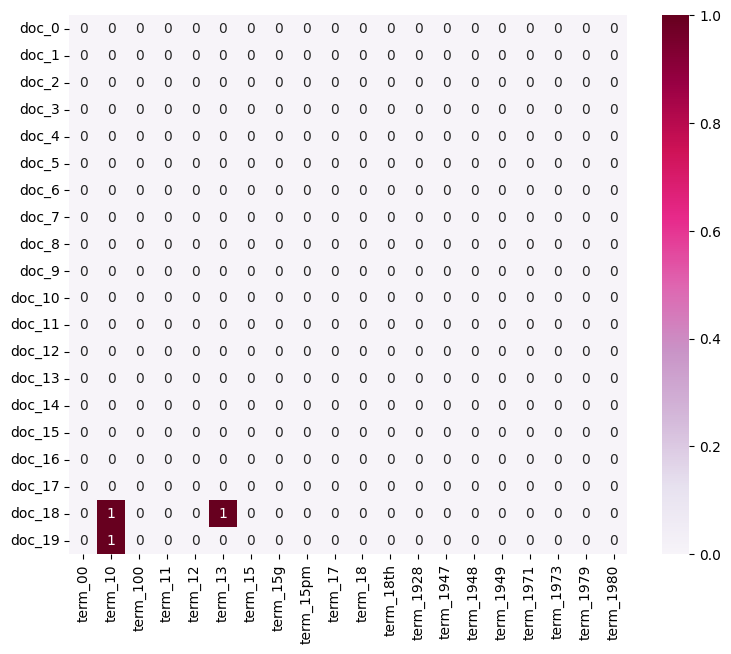

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


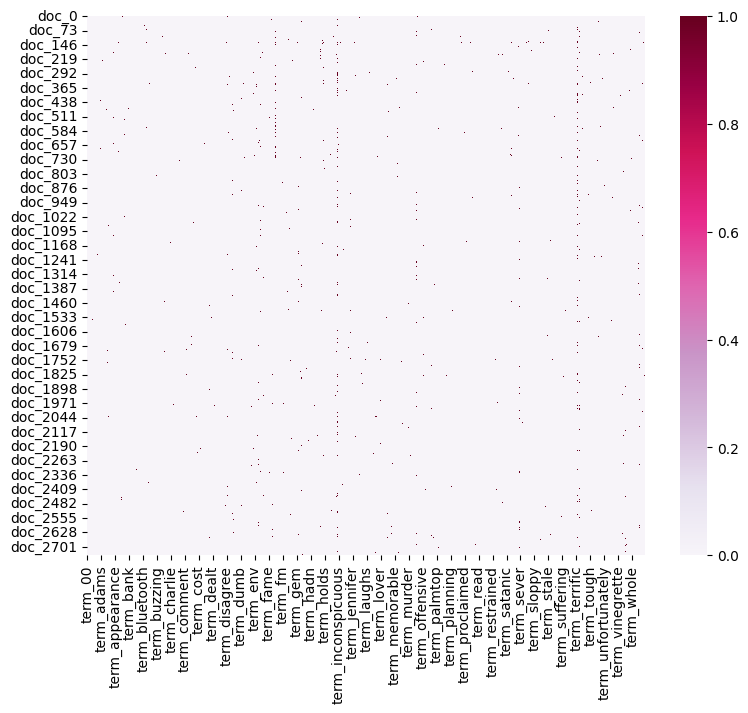

In [280]:
# Answer here
%matplotlib inline

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))

ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1)

In [281]:
# 5.4 Dimensionality Reduction
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())


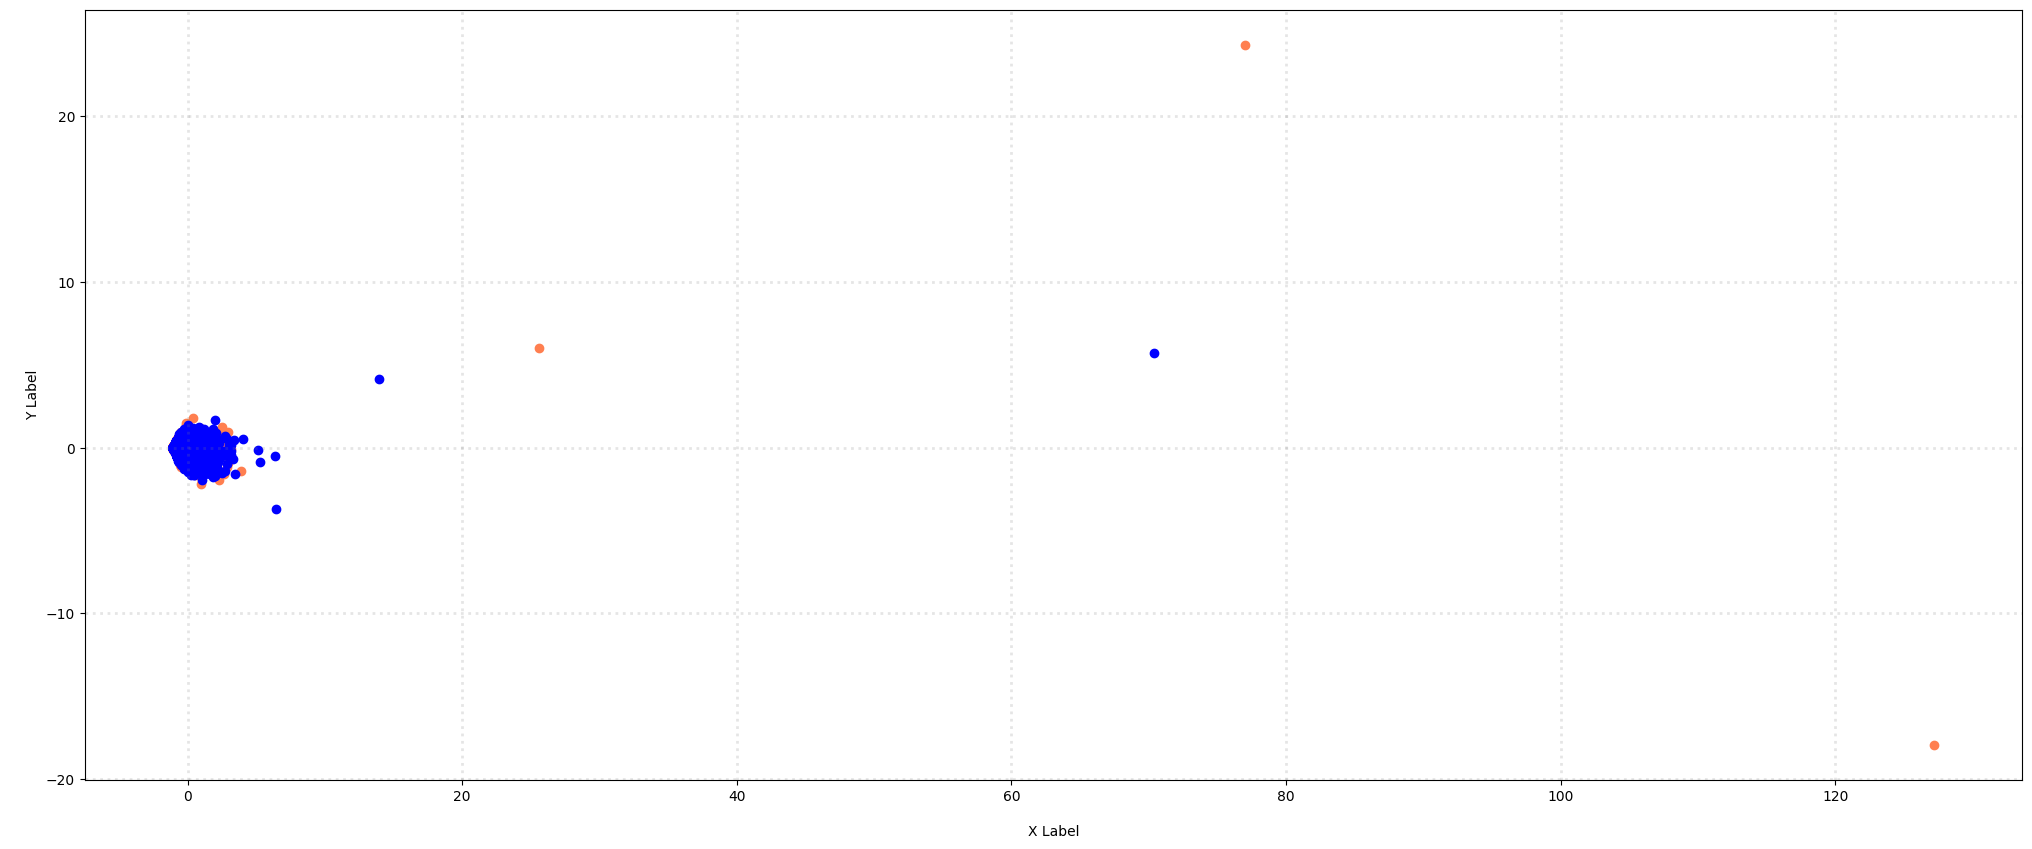

In [282]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiment in zip(col, ["negative", "positive"]):
    xs = X_reduced[X['sentiment'] == sentiment].T[0]
    ys = X_reduced[X['sentiment'] == sentiment].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [283]:
def show_plot(col, categories, category_points, elev=None, azim=None, roll=None, vertical_axis='z'):
    ax = plt.figure().add_subplot(projection='3d')
    for color, category in zip(col, categories):
        x = category_points[category].T[0]
        y = category_points[category].T[1]
        z = category_points[category].T[2]
        ax.scatter(x, y, z, c = color)
    ax.view_init(elev, azim, roll, vertical_axis)

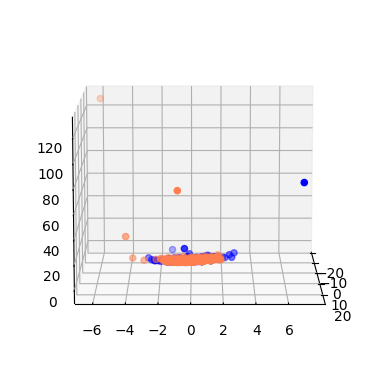

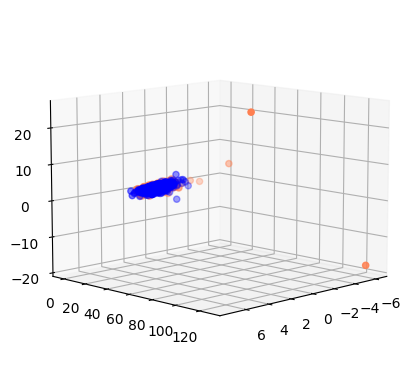

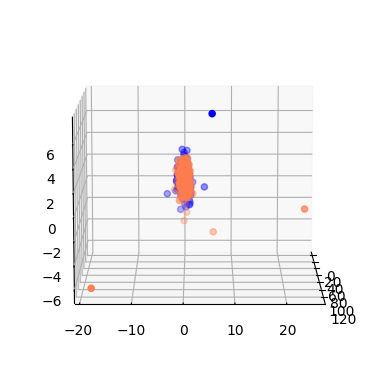

In [284]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue']
categories = ["negative", "positive"]
category_points = {}

for c in categories:
    category_points[c] = X_reduced[X['sentiment'] == c]

show_plot(col, categories, category_points, 10, 0, 0, 'x')
show_plot(col, categories, category_points, 10, 45, 0, 'y')
show_plot(col, categories, category_points, 10, 0, 0, 'z')

In [285]:
# 5.5 Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [286]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([ 1, 38,  3, ...,  1,  2,  1], dtype=int64)

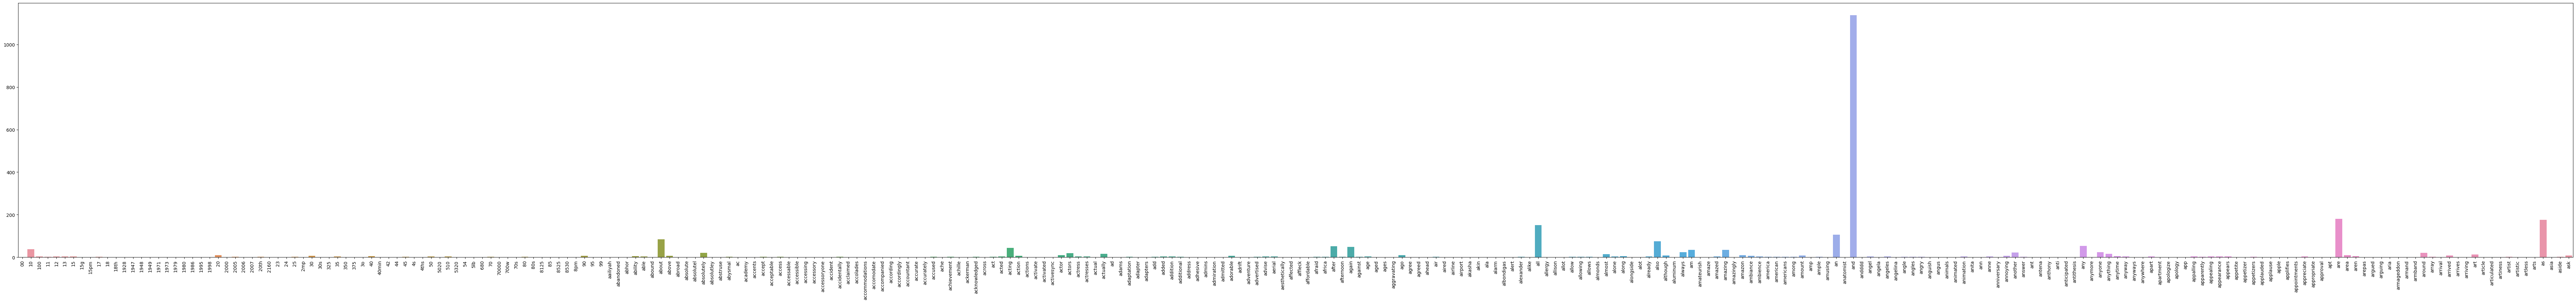

In [287]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [288]:
# Nicer visualization using plotly
import plotly.express as px
data_term = pd.DataFrame({"term": count_vect.get_feature_names_out(), "count": term_frequencies})
fig = px.bar(data_term, x='term', y='count', range_x = [0, 500], range_y=[0, 1200])
fig.show()

In [289]:
# sieve out some terms that appears only a few times
sieved_terms = data_term.loc[data_term.loc[:, "count"] > 2]
sieved_fig = px.bar(sieved_terms, x='term', y='count', range_x = [0, 500], range_y=[0, 1500])
sieved_fig.show()

In [290]:
sorted_terms = data_term.sort_values(by="count", ascending=False)
sorted_fig = px.bar(sorted_terms, x='term', y='count', range_x = [0, 500], range_y=[0, 1200])
sorted_fig.show()

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [ ]:
# 5.6 Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

In [ ]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

# Data Exploration

In [ ]:
from sklearn.preprocessing import binarize

document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

# Third
## Ouline
1. New data visualizations
2. tfidf features
3. Naive Bayes

In [ ]:
# 1. New data visualizations
print(X)
print(X_counts.shape)

In [ ]:
# 2. tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_scores = tfidf_vect.fit_transform(X.sentence)
tfidf_vect.get_feature_names_out()[1000:1100]

In [ ]:
tfidf_analyze = tfidf_vect.build_analyzer()
tfidf_analyze(X.sentence[0])

In [ ]:
plot_x = ["term_"+str(i) for i in tfidf_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_scores.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1)

In [ ]:
# 3. Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

# word frequency features classifier
# uses discrete values such as word frequencies
X_counts_array = X_counts.toarray()
Y = X.sentiment

mnb = MultinomialNB()
mnb.fit(X_counts_array, Y)
predicts = mnb.predict(X_counts_array[:200])
expected = Y[:200]
print("Multinomial accuracy:", accuracy_score(expected, predicts))

# tfidf features classifier
# uses continuous values such as scores
X_scores_array = X_scores.toarray()

gnb = GaussianNB()
gnb.fit(X_scores_array, Y)
predicts = gnb.predict(X_counts_array[:200])
expected = Y[:200]
print("Gaussian accuracy:", accuracy_score(expected, predicts))